In [1]:
import argparse
import scanpy as sc
import plotnine as plt9
import pandas as pd
import numpy as np
import matplotlib as plt
import os
%load_ext autoreload
%autoreload 2
import anndata
import seaborn as sns
import logging
import scipy.stats

In [2]:
fpath="/home/ubuntu/ubuntu/sc_ibd_project/ti_atlas/data/gut-freeze003/ti-cd_healthy/analysis/adata_updated/adata.h5ad"
adata=sc.read(fpath) 

In [3]:
adata.obsm['X_umap']=adata.obsm['X_umap__n_neighbors=153,n_reduced_dims_input=29,umap_init=spectral,umap_min_dist=1pt0,umap_spread=1pt0']
sc.set_figure_params(scanpy=True, dpi=400, dpi_save=400, frameon=True, vector_friendly=True, fontsize=4, figsize=None, color_map=None, format='pdf', facecolor=None, transparent=False, ipython_format='png2x')

In [4]:
df1=pd.DataFrame(adata.obsm['X_umap'], columns=['UMAP1', 'UMAP2'], index=adata.obs_names)
df1.loc[:,'celltype_category']= adata.obs['celltype_category'].astype('category')
#df1.loc[:,'cell_type']= adata.obs['cell_type'].astype('category')

In [5]:
df1.loc[:,'celltype_label']= adata.obs['celltype_label']
#palette=plt.rcParams['axes.prop_cycle']
df1

,UMAP1,UMAP2,celltype_category,celltype_label
CAGTGCGTCAGAGCAG-1-5892STDY8039553,11.450295,-6.446522,Stem cells,Stem cell MKI67+ (1)
GGGTTTAAGACGAGCT-1-5892STDY8039553,11.133955,-9.013494,Stem cells,Stem cell MKI67+ (1)
CATTCTACACTACCGG-1-5892STDY8039553,14.009640,-0.564600,Stem cells,Stem cell MKI67+ (2)
CCTCCTCCATAGGTTC-1-5892STDY8039553,10.848400,-7.051911,Stem cells,Stem cell MKI67+ (1)
GATGATCCACCCTTAC-1-5892STDY8039553,13.810653,-3.538153,Stem cells,Stem cell MKI67+ (2)
...,...,...,...,...
CATTTCATCGTTCATT-1-OTARscRNA9342936,10.959710,12.339205,B Cell,B cell
GAGTTACCACTAACCA-1-OTARscRNA9342936,-2.086140,0.662185,T Cell,T cell CD8+ GZMK+
ACGGAAGCACTCAAGT-1-OTARscRNA9342936,-2.343098,2.256670,T Cell,T cell CD8+ GZMK+
AGACTCACAAGAGATT-1-OTARscRNA9342936,-1.341134,5.566211,T Cell,T cell CD4 naive


In [17]:
#palette=plt.rcParams['axes.prop_cycle']
#palette=palette[: len(np.unique(df1['cell_type']))].by_key()['color']
labels=df1.groupby('celltype_category')['UMAP1', 'UMAP2'].mean()
labels=labels.reset_index()

palette={'B Cell': '#1F77B4',
 'B Cell plasma': '#FF7F0E',
 'Enterocyte': '#279E68',
 'Mesenchymal': '#AA40FC',
 'Myeloid': '#8C564B',
 'Secretory': '#E377C2',
 'Stem cells': '#B5BD61',
 'T Cell': '#17BECF'}

p = plt9.ggplot(df1, plt9.aes(x='UMAP1', y='UMAP2', color='celltype_category'))
p = p + plt9.geom_point(size = 0.1) + plt9.scale_color_manual(values=palette)
p = p + plt9.theme_void() + plt9.theme(legend_title = plt9.element_blank(), legend_text = plt9.element_blank()) 
p = p + plt9.geom_text(x=labels['UMAP1'] , y=labels['UMAP2'], label=labels['celltype_category'] , color='black', size=10)
p
plt9.ggsave(plot=p, filename='/home/ubuntu/ubuntu/sc_ibd_project/ti_atlas/figures-ti_cd_singlecell/figures/00055-study_overview/umap/umap.png',dpi = 150, 
            width = 6,height = 6, device="png") 

/home/ubuntu/miniconda3/envs/python_env/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
/home/ubuntu/miniconda3/envs/python_env/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6 x 6 in image.
/home/ubuntu/miniconda3/envs/python_env/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /home/ubuntu/ubuntu/sc_ibd_project/ti_atlas/figures-ti_cd_singlecell/figures/00055-study_overview/umap/umap.png
/home/ubuntu/miniconda3/envs/python_env/lib/python3.7/site-packages/plotnine/layer.py:464: PlotnineWarning: geom_text : Removed 141589 rows containing missing values.
/home/ubuntu/miniconda3/envs/python_env/lib/python3.7/site-packages/plotnine/ggplot.py:744: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "device" which is no longer supported as of 3.3 and will become an error two minor relea

/home/ubuntu/miniconda3/envs/python_env/lib/python3.7/site-packages/plotnine/layer.py:464: PlotnineWarning: geom_text : Removed 141589 rows containing missing values.


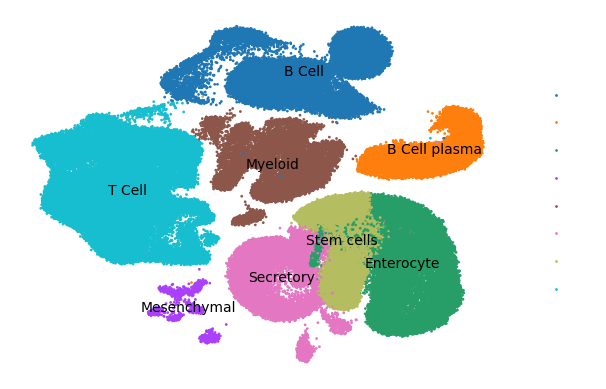

<ggplot: (8777996458765)>

In [18]:
p

In [19]:
file="/home/ubuntu/ubuntu/sc_ibd_project/ti_atlas/manuscript/ti_atlas_code/figures/data/palette.tsv" 
pal=pd.read_table(file, sep='\t')

#pal=pal[['category', "palette_category"]].drop_duplicates()
#palette = {}                                                               
#for j in pal["category"].tolist(): 
#    palette[j] = pal[pal["category"]==j]["palette_category"].to_list() 
pal

,palette_label,label,cluster,category,palette_category
0,#1f77b4,B cell,27,B Cell,#1F77B4
1,#ff7f0e,B cell activated,34,B Cell,#1F77B4
2,#279e68,B cell germinal centre/plasmablasts,31,B Cell,#1F77B4
3,#d62728,B cell memory (1),3,B Cell,#1F77B4
4,#aa40fc,B cell memory (2),8,B Cell,#1F77B4
5,#8c564b,B cell naive,1,B Cell,#1F77B4
6,#1f77b4,B cell plasma IgA (1),12,B Cell plasma,#FF7F0E
7,#ff7f0e,B cell plasma IgA (2),2,B Cell plasma,#FF7F0E
8,#279e68,B cell plasma IgA (3),11,B Cell plasma,#FF7F0E
9,#1f77b4,Enterocyte middle villus (1),15,Enterocyte,#279E68


/home/ubuntu/miniconda3/envs/python_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ubuntu/miniconda3/envs/python_env/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


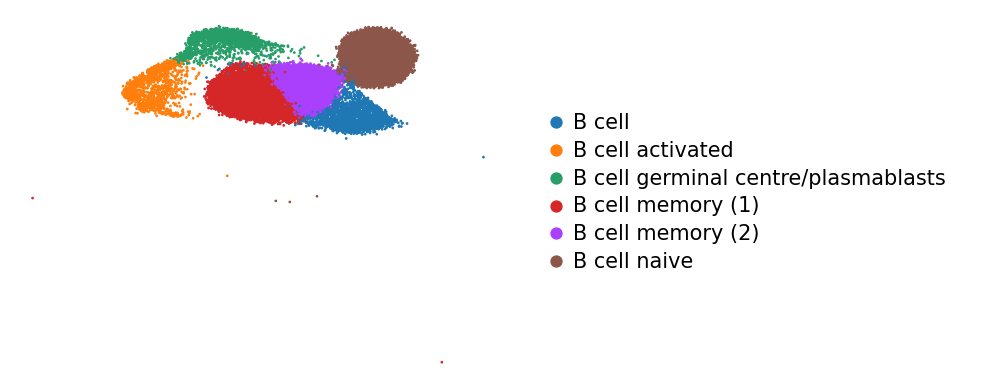

<ggplot: (8777867488749)>


/home/ubuntu/miniconda3/envs/python_env/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6 x 6 in image.
/home/ubuntu/miniconda3/envs/python_env/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /home/ubuntu/ubuntu/sc_ibd_project/ti_atlas/figures-ti_cd_singlecell/figures/00055-study_overview/umap/B_Cell.png
/home/ubuntu/miniconda3/envs/python_env/lib/python3.7/site-packages/plotnine/ggplot.py:744: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "device" which is no longer supported as of 3.3 and will become an error two minor releases later
/home/ubuntu/miniconda3/envs/python_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

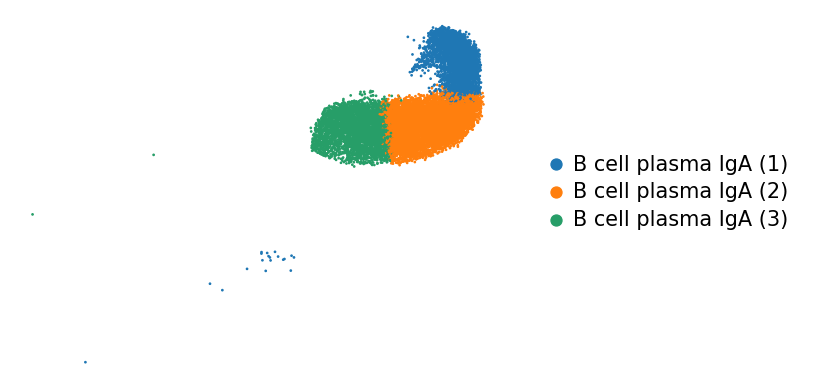

<ggplot: (8777867188885)>


/home/ubuntu/miniconda3/envs/python_env/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6 x 6 in image.
/home/ubuntu/miniconda3/envs/python_env/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /home/ubuntu/ubuntu/sc_ibd_project/ti_atlas/figures-ti_cd_singlecell/figures/00055-study_overview/umap/B_Cell_plasma.png
/home/ubuntu/miniconda3/envs/python_env/lib/python3.7/site-packages/plotnine/ggplot.py:744: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "device" which is no longer supported as of 3.3 and will become an error two minor releases later
/home/ubuntu/miniconda3/envs/python_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

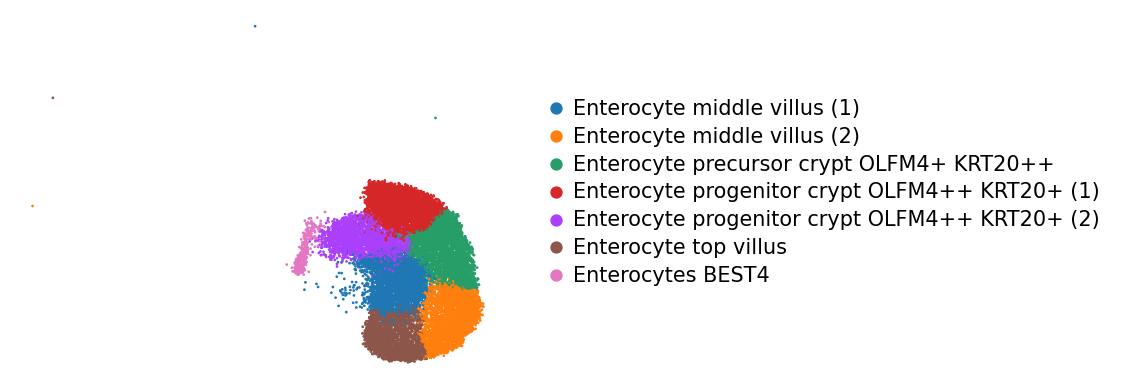

<ggplot: (8777996469121)>


/home/ubuntu/miniconda3/envs/python_env/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6 x 6 in image.
/home/ubuntu/miniconda3/envs/python_env/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /home/ubuntu/ubuntu/sc_ibd_project/ti_atlas/figures-ti_cd_singlecell/figures/00055-study_overview/umap/Enterocyte.png
/home/ubuntu/miniconda3/envs/python_env/lib/python3.7/site-packages/plotnine/ggplot.py:744: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "device" which is no longer supported as of 3.3 and will become an error two minor releases later
/home/ubuntu/miniconda3/envs/python_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

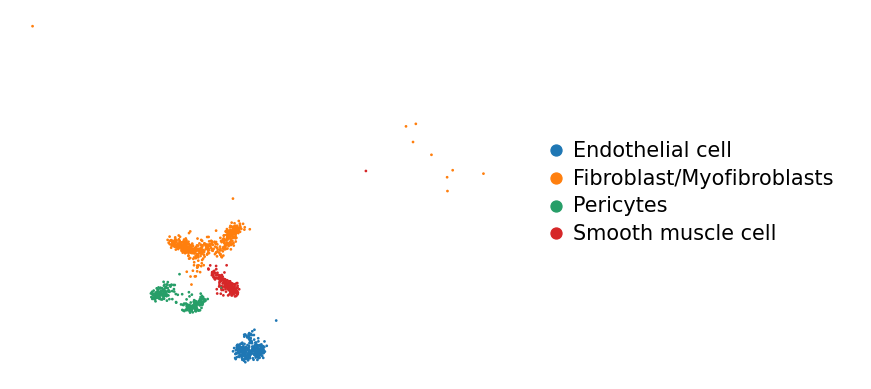

<ggplot: (8777952340297)>


/home/ubuntu/miniconda3/envs/python_env/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6 x 6 in image.
/home/ubuntu/miniconda3/envs/python_env/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /home/ubuntu/ubuntu/sc_ibd_project/ti_atlas/figures-ti_cd_singlecell/figures/00055-study_overview/umap/Mesenchymal.png
/home/ubuntu/miniconda3/envs/python_env/lib/python3.7/site-packages/plotnine/ggplot.py:744: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "device" which is no longer supported as of 3.3 and will become an error two minor releases later
/home/ubuntu/miniconda3/envs/python_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

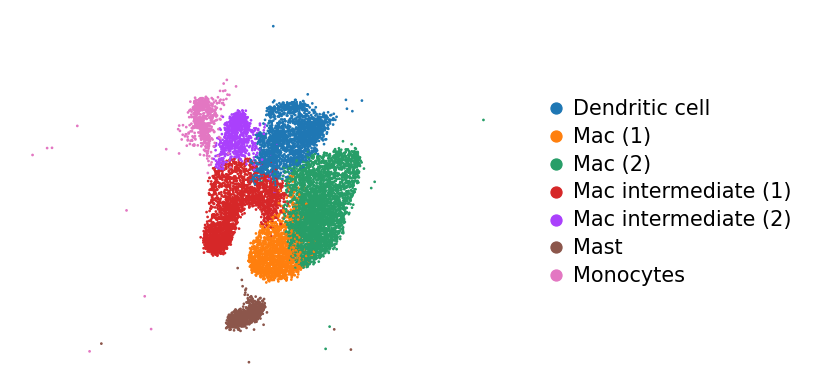

<ggplot: (8777866209533)>


/home/ubuntu/miniconda3/envs/python_env/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6 x 6 in image.
/home/ubuntu/miniconda3/envs/python_env/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /home/ubuntu/ubuntu/sc_ibd_project/ti_atlas/figures-ti_cd_singlecell/figures/00055-study_overview/umap/Myeloid.png
/home/ubuntu/miniconda3/envs/python_env/lib/python3.7/site-packages/plotnine/ggplot.py:744: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "device" which is no longer supported as of 3.3 and will become an error two minor releases later
/home/ubuntu/miniconda3/envs/python_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

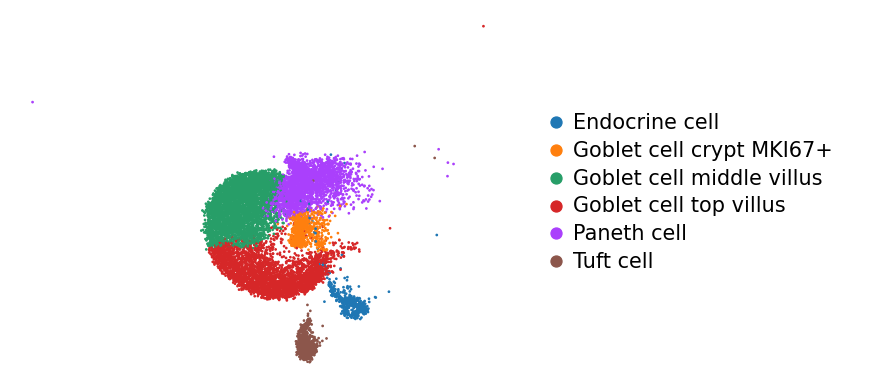

<ggplot: (8777996206757)>


/home/ubuntu/miniconda3/envs/python_env/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6 x 6 in image.
/home/ubuntu/miniconda3/envs/python_env/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /home/ubuntu/ubuntu/sc_ibd_project/ti_atlas/figures-ti_cd_singlecell/figures/00055-study_overview/umap/Secretory.png
/home/ubuntu/miniconda3/envs/python_env/lib/python3.7/site-packages/plotnine/ggplot.py:744: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "device" which is no longer supported as of 3.3 and will become an error two minor releases later
/home/ubuntu/miniconda3/envs/python_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

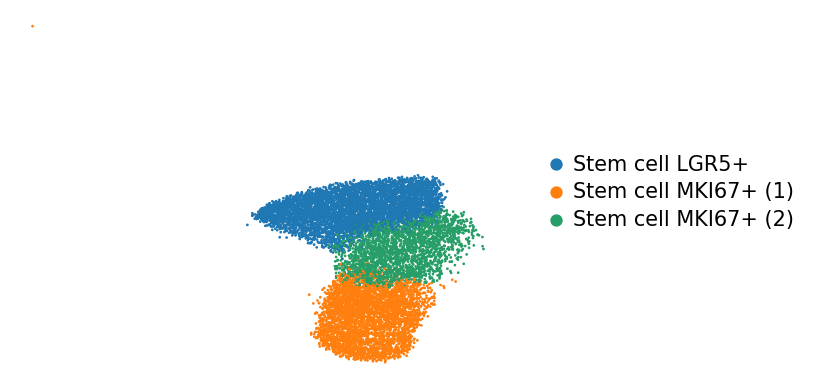

<ggplot: (8777996260561)>


/home/ubuntu/miniconda3/envs/python_env/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6 x 6 in image.
/home/ubuntu/miniconda3/envs/python_env/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /home/ubuntu/ubuntu/sc_ibd_project/ti_atlas/figures-ti_cd_singlecell/figures/00055-study_overview/umap/Stem_cells.png
/home/ubuntu/miniconda3/envs/python_env/lib/python3.7/site-packages/plotnine/ggplot.py:744: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "device" which is no longer supported as of 3.3 and will become an error two minor releases later
/home/ubuntu/miniconda3/envs/python_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

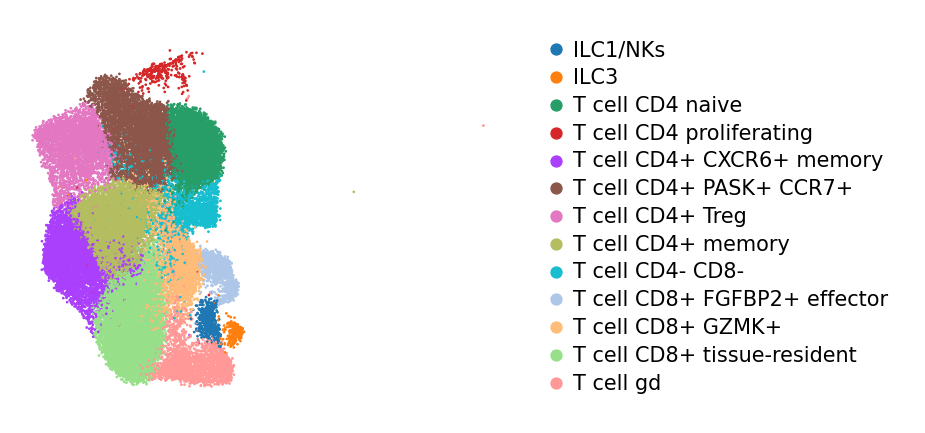

<ggplot: (8777867200453)>


/home/ubuntu/miniconda3/envs/python_env/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6 x 6 in image.
/home/ubuntu/miniconda3/envs/python_env/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /home/ubuntu/ubuntu/sc_ibd_project/ti_atlas/figures-ti_cd_singlecell/figures/00055-study_overview/umap/T_Cell.png
/home/ubuntu/miniconda3/envs/python_env/lib/python3.7/site-packages/plotnine/ggplot.py:744: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "device" which is no longer supported as of 3.3 and will become an error two minor releases later


In [20]:
category1=np.unique(adata.obs['celltype_category'])
for i in category1:
    df2=df1[df1['celltype_category']==i]
    i_out = i.replace(' ', '_').replace('.', '_').replace('/', '-')
    #df2['celltype_label']=df2['celltype_label'].astype('category')
    df2['celltype_label']=df2['celltype_label'].astype(str).astype('category')
    pd.DataFrame(data=df2)
    #print(df2)
    
    if len(np.unique(df2['celltype_label'])) > 1:
        palette=plt.rcParams['axes.prop_cycle']
        palette=palette[: len(np.unique(df2['celltype_label']))].by_key()['color']
        
        labels=df2.groupby('celltype_label')['UMAP1', 'UMAP2'].mean()
        labels=labels.reset_index().dropna()
        print()
        
        #print(labels.dropna())
        p = plt9.ggplot(df2, plt9.aes(x='UMAP1', y='UMAP2', color='celltype_label'))
        p = p + plt9.geom_point(size = 0.1) + plt9.scale_color_manual(values=palette, drop=True)
        p = p + plt9.theme_void() + plt9.theme(legend_title = plt9.element_blank(), 
                                               legend_text = plt9.element_text(size = 15)) + plt9.guides(colour=plt9.guide_legend(ncol=1, override_aes={"size": 4}))#+ plt9.theme(legend_position = 'none') #, legend_text = plt9.element_text(size = 12)) #+ plt9.guides(colour=plt9.guide_legend(ncol=1, override_aes={"size": 4}))
        #p = p + plt9.geom_text(x=labels['UMAP1'] , y=labels['UMAP2'], label=labels['cell_type'] , color='black', size=10)
        print(p)
        plt9.ggsave(plot=p, filename='/home/ubuntu/ubuntu/sc_ibd_project/ti_atlas/figures-ti_cd_singlecell/figures/00055-study_overview/umap/{}.png'.format(i_out), 
                    width = 6,height = 6, dpi = 150,device="png") 
        
        #p = plt9.ggplot(df2, plt9.aes(x='UMAP1', y='UMAP2', color='celltype_label'))
        #p = p + plt9.geom_point(size = 0.1) + plt9.scale_color_manual(values=palette)
        #p = p + plt9.theme_void() + plt9.theme(legend_title = plt9.element_blank(), legend_text = plt9.element_text(size = 12)) + plt9.guides(colour=plt9.guide_legend(ncol=1, override_aes={"size": 4}))#+ plt9.theme(legend_position = 'none') #, legend_text = plt9.element_text(size = 12)) #+ plt9.guides(colour=plt9.guide_legend(ncol=1, override_aes={"size": 4}))
        #p = p + plt9.geom_text(x=labels['UMAP1'] , y=labels['UMAP2'], label=labels['cell_type'] , color='black', size=10)
        #print(p)
        #plt9.ggsave(plot=p, filename='{}.png'.format(i_out), width = 6,height = 6) 
